# Part I - Ford GoBike System Data Exploration
## by Samuel Shaibu

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 

>In the San Francisco Bay Area of California, there is a regional public bike sharing program called Bay Wheels (formerly Ford GoBike). With approximately 500,000 rides since its debut in 2017, Bay Wheels is the first regional and extensive bicycle sharing system set up in California and along the West Coast of the United States. As of January 2018, it has about 10,000 annual subscribers. The monthly individual trip data for the broader San Francisco Bay area in CSV format from January 2018 to December 2018 comprise the dataset used for this exploratory investigation.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Gathering Data

In [2]:
df_ford = pd.read_csv('201902-fordgobike-tripdata.csv')
df_ford.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### Assessing Data

In [3]:
df_ford.info

<bound method DataFrame.info of         duration_sec                start_time                  end_time  \
0              52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1              42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2              61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3              36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4               1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
...              ...                       ...                       ...   
183407           480  2019-02-01 00:04:49.7240  2019-02-01 00:12:50.0340   
183408           313  2019-02-01 00:05:34.7440  2019-02-01 00:10:48.5020   
183409           141  2019-02-01 00:06:05.5490  2019-02-01 00:08:27.2200   
183410           139  2019-02-01 00:05:34.3600  2019-02-01 00:07:54.2870   
183411           271  2019-02-01 00:00:20.6360  2019-02-01 00:04:52.0580   

        start_station_id                               

In [4]:
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df_ford.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
df_ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df_ford.duplicated().sum()

0

In [8]:
df_ford.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
df_ford.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [10]:
df_ford.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [11]:
df_ford.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

### Cleaning

In [12]:
# To copy the dataframe

df_ford_new = df_ford.copy()

# To convert to the appropriate data types

df_ford_new['start_time'] = pd.to_datetime(df_ford_new['start_time'])
df_ford_new['end_time'] = pd.to_datetime(df_ford_new['end_time'])

df_ford_new['start_station_id'] = df_ford_new['start_station_id'].astype('str')
df_ford_new['end_station_id'] = df_ford_new['end_station_id'].astype('str')
df_ford_new['bike_id'] = df_ford_new['bike_id'].astype('str')

df_ford_new['user_type'] = df_ford_new['user_type'].astype('category')
df_ford_new['member_gender'] = df_ford_new['member_gender'].astype('category')

In [13]:
df_ford_new.info

<bound method DataFrame.info of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1              42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
0                  21.0  M

In [14]:
df_ford_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

#### Add a new column - `member_age`

In [15]:
# To add a new column - member_age from member birth year

df_ford_new['member_age'] = 2022 - df_ford_new['member_birth_year']

In [16]:
df_ford_new.describe

<bound method NDFrame.describe of         duration_sec              start_time                end_time  \
0              52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
1              42521 2019-02-28 18:53:21.789 2019-03-01 06:42:03.056   
2              61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3              36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4               1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
...              ...                     ...                     ...   
183407           480 2019-02-01 00:04:49.724 2019-02-01 00:12:50.034   
183408           313 2019-02-01 00:05:34.744 2019-02-01 00:10:48.502   
183409           141 2019-02-01 00:06:05.549 2019-02-01 00:08:27.220   
183410           139 2019-02-01 00:05:34.360 2019-02-01 00:07:54.287   
183411           271 2019-02-01 00:00:20.636 2019-02-01 00:04:52.058   

       start_station_id                                start_station_name  \
0                  21.0 

In [17]:
# To add new columns as duration in minutes and start_time to yyyy-mm-dd format and other transformations

df_ford_new['duration_minute'] = df_ford_new['duration_sec']/60
df_ford_new['start_date'] = df_ford_new.start_time.dt.strftime('%y-%m-%d')
df_ford_new['start_date_hour'] = df_ford_new.start_time.dt.strftime('%H')
df_ford_new['start_date_day'] = df_ford_new.start_time.dt.strftime('%A')
df_ford_new['start_date_month'] = df_ford_new.start_time.dt.strftime('%B')

In [18]:
# To print out the top 10 rows of the cleaned dataframe

df_ford_new.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_minute,start_date,start_date_hour,start_date_day,start_date_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984.0,Male,No,38.0,869.750000,19-02-28,17,Thursday,February
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,Customer,NaN,NaN,No,NaN,708.683333,19-02-28,18,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972.0,Male,No,50.0,1030.900000,19-02-28,12,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989.0,Other,No,33.0,608.166667,19-02-28,17,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974.0,Male,Yes,48.0,26.416667,19-02-28,23,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959.0,Male,No,63.0,29.883333,19-02-28,23,Thursday,February
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Subscriber,1983.0,Female,No,39.0,19.116667,19-02-28,23,Thursday,February
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1989.0,Male,No,33.0,26.916667,19-02-28,23,Thursday,February
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Subscriber,1988.0,Other,No,34.0,26.166667,19-02-28,23,Thursday,February
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Subscriber,1992.0,Male,No,30.0,17.483333,19-02-28,23,Thursday,February


In [19]:
# To filter out outliers of age from the distribution

df_ford_new = df_ford_new.query('member_age <= 70')

In [20]:
# To change the data type of member age and member birth year from float to int

df_ford_new['member_birth_year'] = df_ford_new['member_birth_year'].astype('int')
df_ford_new['member_age'] = df_ford_new['member_age'].astype('int')
df_ford_new.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174115 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174115 non-null  int64         
 1   start_time               174115 non-null  datetime64[ns]
 2   end_time                 174115 non-null  datetime64[ns]
 3   start_station_id         174115 non-null  object        
 4   start_station_name       173920 non-null  object        
 5   start_station_latitude   174115 non-null  float64       
 6   start_station_longitude  174115 non-null  float64       
 7   end_station_id           174115 non-null  object        
 8   end_station_name         173920 non-null  object        
 9   end_station_latitude     174115 non-null  float64       
 10  end_station_longitude    174115 non-null  float64       
 11  bike_id                  174115 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> The dataset contains 183,412 trips with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, bike_id, user_type, member_birth_year, member_gender, and bike_share_for_all_trip). 

### What is/are the main feature(s) of interest in your dataset?

> In order to understand how and why individuals use the bike sharing service, I'm primarily interested in examining the length of bike trips and the frequency of rental events, as well as how these relate to the riders' attributes, such as their user type, gender, and age. Typical inquiries to be addressed When, in terms of the time of day, the day of the week, or the month of the year, are most travels taken? How long does a typical trip last? Does the aforementioned depend on a user's status as a subscriber or client?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The duration and start time for each trip will help you determine how long it typically takes and when. We may identify the primary target consumer segments using member data like user type, gender, and age. We can then use the various groups to summarize bike usage data to check for any distinctive patterns related to particular riding demographics.

## Univariate Exploration



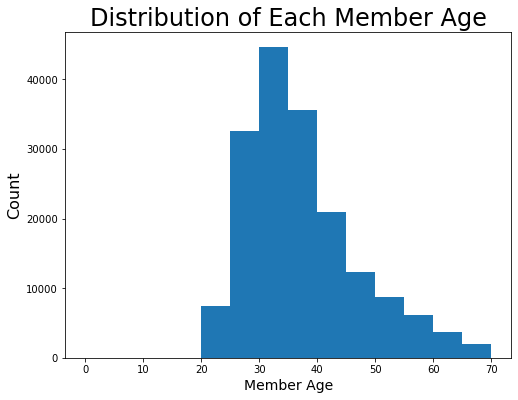

In [21]:
# What is the distribution of bike trips among members of different ages?

plt.figure(figsize = [8, 6])
bins = np.arange(0, df_ford_new['member_age'].max() + 5, 5)
plt.hist(df_ford_new['member_age'].dropna(), bins = bins); 
plt.xlabel('Member Age', fontsize = 14);
plt.ylabel('Count', fontsize = 16);
plt.title('Distribution of Each Member Age', fontsize = 24);

**Here are my observations from the plot above**

>The majority of users were male customers who did not always use the bike share service. The trip distribution plots show that the majority of trips occurred between the ages of 25 and 40, with the peak number of trips occurring during rush hours on weekdays. The use of bicycles decreased dramatically as people aged.

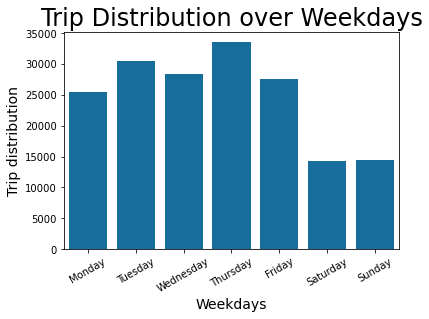

In [23]:
# What is the distribution of bike trips throughout the days of the week?
# To plot the trip distribution over weekdays

week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette('colorblind')[0]

# To make weekday categorical data types

weekday_cate = pd.api.types.CategoricalDtype(ordered = True, categories = week_days)
df_ford_new['start_date_day'] = df_ford_new['start_date_day'].astype(weekday_cate)

sb.countplot(data = df_ford_new, x = 'start_date_day', color = base_color);
plt.xlabel('Weekdays', fontsize = 14);
plt.ylabel('Trip distribution', fontsize = 14);
plt.xticks(rotation = 30);
plt.title('Trip Distribution over Weekdays', fontsize = 24);



The visual above shows that Thursday recorded the highest number of trip distributions followed by Tuesday. We can also conclude from the plot above that there are way more less trips on weekends compared to on weekdays (Mondays to Fridays).

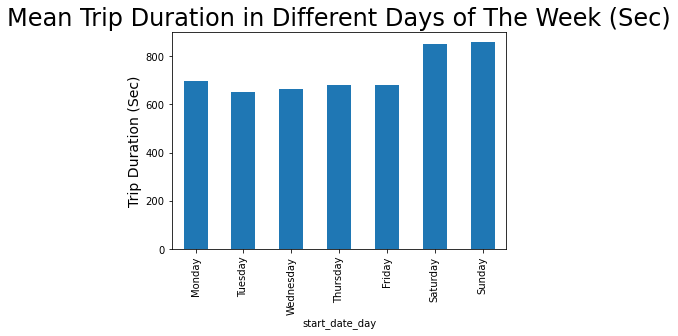

In [24]:
# What is the bike trip duration in different days of the week?

# Group by the start day 
plt.title('Mean Trip Duration in Different Days of The Week (Sec)', fontsize = 24)
plt.ylabel('Trip Duration (Sec)', fontsize = 14)
df_ford_new.groupby(['start_date_day'])['duration_sec'].mean().plot(kind = 'bar');

### Observation from the above plot:

The trip duration seems to be relatively consistent from Monday to Friday. However, Saturdays and Sundays record the highest trip duration in seconds. This shows that most bike riders spend more time riding bikes on weekends than on weekdays.

Text(0.5, 1.0, 'Distribution of Trip Duration')

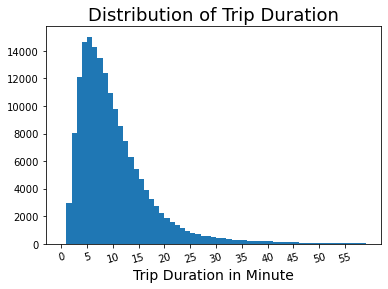

In [25]:
# What is the distribution of trip duration in minute?

bins = np.arange(0, 60, 1)
ticks = np.arange(0, 60, 5)
plt.hist(data = df_ford_new, x = 'duration_minute', bins = bins);
plt.xticks(ticks, ticks, rotation = 15);
plt.xlabel('Trip Duration in Minute', fontsize = 14);
plt.title('Distribution of Trip Duration', fontsize = 18)

**Here are some of my observations from the above plot:**

>I observed that 99 percent of the journeys were shorter than an hour, with the majority lasting between five and ten minutes. To enable concentrating on the most frequent occurrences to analyze the trend, I'll remove the outlier lengthy journeys from this analysis.

In [26]:
# To filter out outliers in trip duration in minute

df_ford_new = df_ford_new.query('duration_minute <= 60')
df_ford_new.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172731 entries, 4 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             172731 non-null  int64         
 1   start_time               172731 non-null  datetime64[ns]
 2   end_time                 172731 non-null  datetime64[ns]
 3   start_station_id         172731 non-null  object        
 4   start_station_name       172540 non-null  object        
 5   start_station_latitude   172731 non-null  float64       
 6   start_station_longitude  172731 non-null  float64       
 7   end_station_id           172731 non-null  object        
 8   end_station_name         172540 non-null  object        
 9   end_station_latitude     172731 non-null  float64       
 10  end_station_longitude    172731 non-null  float64       
 11  bike_id                  172731 non-null  object        
 12  user_type       

Text(0.5, 1.0, 'Trip Distribution over Day Hours')

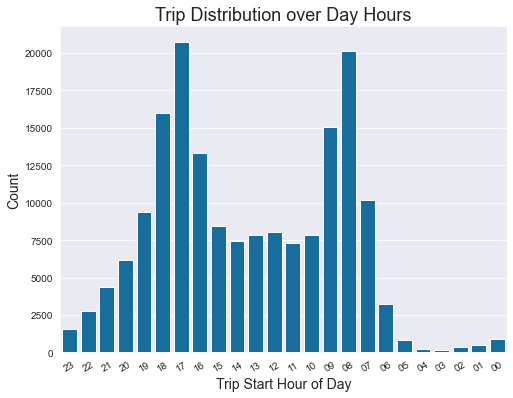

In [27]:
# What is the bike distribution for every hour of the day?

# To plot trip distribution over day hours

plt.figure(figsize = [8, 6])
base_color = sb.color_palette('colorblind')[0]
sb.set_style('darkgrid')

sb.countplot(data = df_ford_new, x = 'start_date_hour', color = base_color);
plt.xticks(rotation = 30)
plt.xlabel('Trip Start Hour of Day', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Trip Distribution over Day Hours', fontsize = 18)

### Observation

From the plot above, we can conclude that there are more bike trips between 8am and 9am and 5pm to 6pm during the day. The summer season was the busiest time of the year, probably because of the climate.

Text(0.5, 1.0, 'Trip Distribution across User Types')

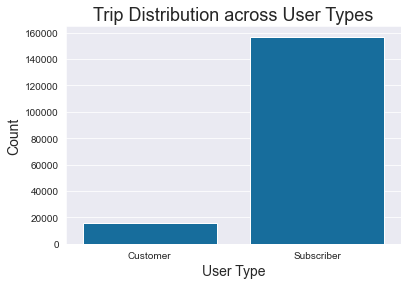

In [28]:
# What is the bike distribution across User types?
# To get the some plots around users type 

# To use the Seaborn library to plot the column chart
sb.countplot(data = df_ford_new, x = 'user_type', color = base_color);
plt.xlabel('User Type', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Trip Distribution across User Types', fontsize = 18)

The plot above shows that Subscribers record more bike trips distribution than Customers. The difference in trip distribution is too much.

Text(0.5, 1.0, 'Bike Shared For All Trip Frequency')

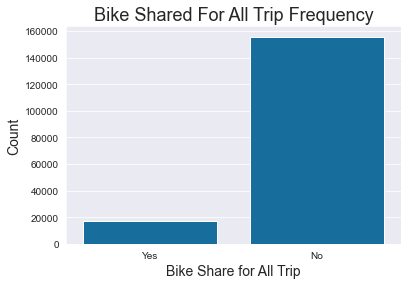

In [29]:
# Bikes shared for all trips?
# To get some plots around bikes shared for all trips

sb.countplot(data = df_ford_new, x = 'bike_share_for_all_trip', color = base_color);
plt.xlabel('Bike Share for All Trip', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Bike Shared For All Trip Frequency', fontsize = 18)

The plot is basically showing that for most bike trips distribution there are no bike shared compared to the bikes being shared. 

We can conclude that the frequency of bikes shared way lesser than the frequency of bikes not shared.

Text(0.5, 1.0, 'Trip Distribution across Gender')

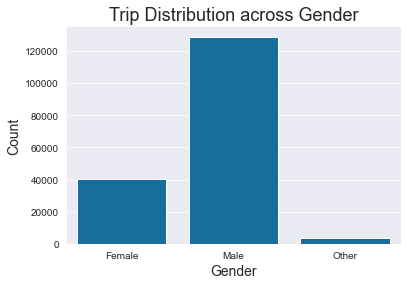

In [30]:
# Which gender have the highest number of trips?
# To get some plots around member gender

sb.countplot(data = df_ford_new, x = 'member_gender', color = base_color);
plt.xlabel('Gender', fontsize = 14);
plt.ylabel('Count', fontsize = 14);
plt.title('Trip Distribution across Gender', fontsize = 18)

#### Here's an observation from the plot above:

* The male gender have the highest number of trip distributions

* We can also notice that there are few people that did not recognize as male/female with trip distributions.

In [31]:
# To save the cleaned datframe in CSV format

df_ford_new.to_csv('ford_cleaned_data.csv', index = False)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> In terms of users, men outnumbered women riders, and most users—as opposed to casual riders—were subscribers. Most of the participants were between the ages of 25 and 40, and the majority did not utilize bike sharing for all of their journeys.

> There were more trips on work days than on weekends. The number of journeys peaked between 8 and 9 am and 17 to 18 pm during the day. The summer season was the busiest time of the year, probably because of the climate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When the initial data were plotted, the distribution of the trip duration caught us off guard. The distribution was made considerably clearer by using `.describe()` and `.xticks()` to zoom in to a smaller area where the majority of trip records fell. I removed the outlier long trip records for the research using `.query()` to help focus on the major instances of usual system use.

> When investigating the Birth year variables, Birth year is converted by substracting the year from current year in order to give the distibution for age and better perception.

## Bivariate Exploration



In [32]:
# To define the quantitative variables for the next plotting 
quantitative_columns = []
for col in df_ford_new.columns : 
    if df_ford_new[col].dtype != 'O':
        quantitative_columns.append(col)
quantitative_columns = quantitative_columns[1:]
quantitative_columns

['start_time',
 'end_time',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_latitude',
 'end_station_longitude',
 'user_type',
 'member_birth_year',
 'member_gender',
 'member_age',
 'duration_minute',
 'start_date_day']

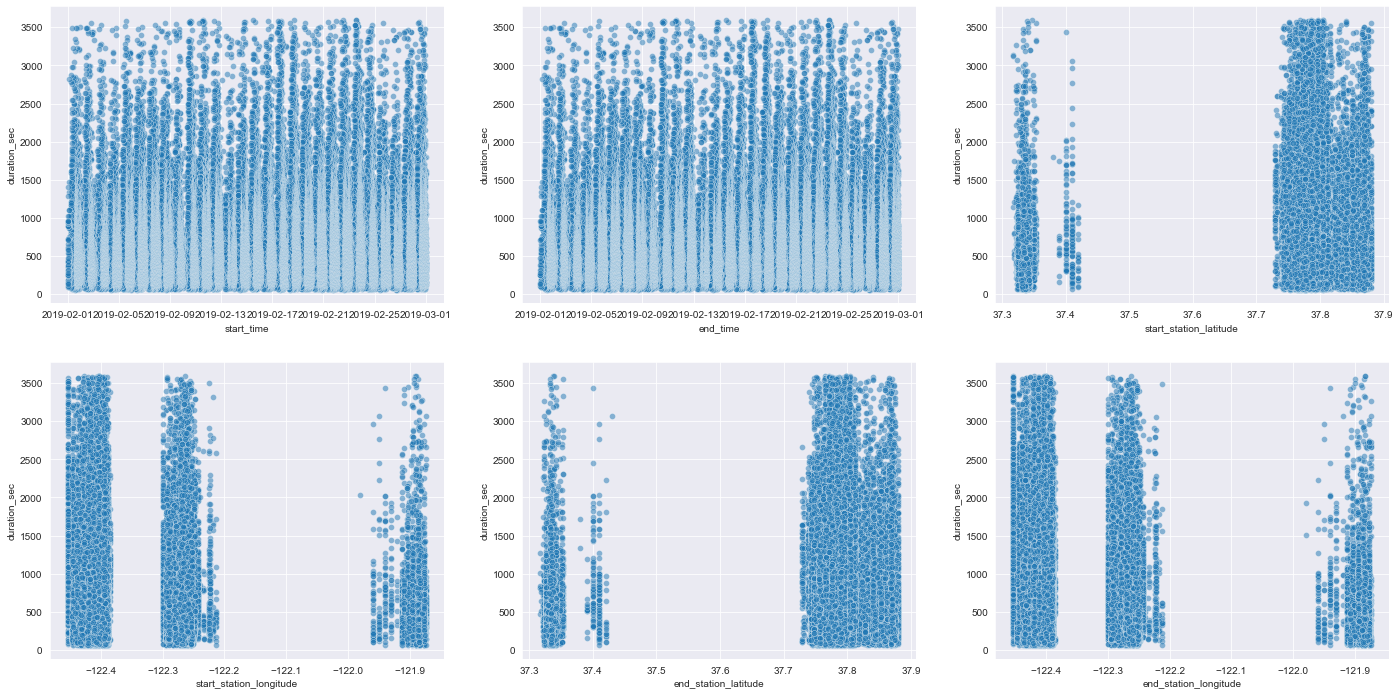

In [35]:
# What is the relationship between the quantitative variables and the time duration?
# To make scatter plots to determine the association between quantitative factors and duration time
nrows, ncolumns = 2, 3 
columns = quantitative_columns
color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows = nrows, ncols = ncolumns, figsize = (24, 12))
for i in range(nrows):
   
    for j in range(ncolumns): 
        sb.scatterplot(data = df_ford_new,y = df_ford_new['duration_sec'],x = df_ford_new[columns[i * ncolumns + j]],
                        color = color, ax = ax[i,j],alpha = 0.5)
        

From the scatter plots above, there are some correlations between the quantitative variables and the time duration in seconds

Text(0.5, 1.0, 'Trip Duration Distribution between Customers and Subscribers')

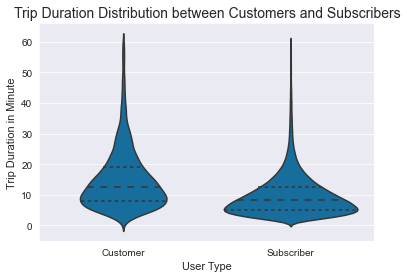

In [36]:
# What is the trip duration distribution between the user types?
# To get the trip duration distribution between customers and subscribers

sb.violinplot(data = df_ford_new, x = 'user_type', y = 'duration_minute', color = base_color, inner = 'quartile');
plt.xlabel('User Type', fontsize = 11);
plt.ylabel('Trip Duration in Minute', fontsize = 11);
plt.title('Trip Duration Distribution between Customers and Subscribers', fontsize = 14)

My observation from the above plot is that the trip duration in minutes for Customer is much more narrow than the trip duration in miuntes for Subscriber, especially for shorter time (between 5 - 15 minutes).

Text(0.5, 1.0, 'Average Trip Duration by Weekdays')

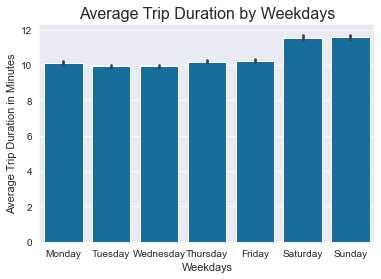

In [37]:
# What is the average trip duration from Monday through to Sunday?
# To get the average trip duration in weekdays

sb.barplot(data = df_ford_new, x = 'start_date_day', y = 'duration_minute', color = base_color);
plt.xlabel('Weekdays', fontsize = 11);
plt.ylabel('Average Trip Duration in Minutes', fontsize = 11);
plt.title('Average Trip Duration by Weekdays', fontsize = 16)

### Here's a major observation from the plot above:

Weekends record more average trip duration in minutes, compared to other weekdays (Mondays to Fridays).

Text(0.5, 1.0, 'Trip Duration Distribution between Genders')

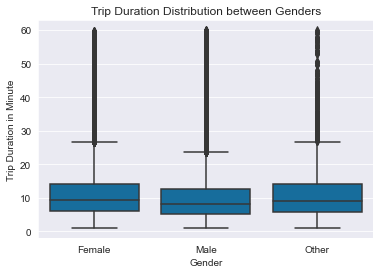

In [165]:
# To get the trip duration distribution between genders

sb.boxplot(data = df_ford_new, x = 'member_gender', y = 'duration_minute', color = base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');
plt.title('Trip Duration Distribution between Genders')

### We can make the following observations from the box plot above:

* Median value for trip duration is lower in the Male gender compared to the Female gender.
* The range for trip duration is lower in the Male gender compared to the Female gender.
* The interquartile range is also lower in the Male gender compared to the Female gender.

These observation and subsequent related observation shows that though there are more trip distributions among the Male gender, the Female gender tends to spend more time on bike trips from the plot above.

Text(0.5, 1.0, 'Ford GoBike Weekly Usage between Customers and Subscribers')

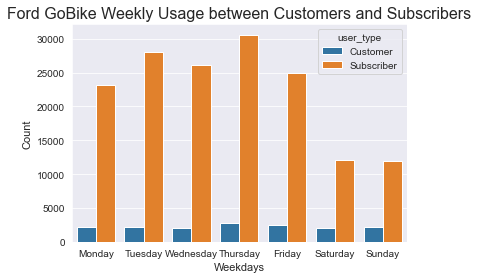

In [38]:
# What is the weekly usage of bikes between customers and subscribers?
# To plot weekly usage between customers and subscribers

sb.countplot(data = df_ford_new, x = 'start_date_day', hue = 'user_type');
plt.xlabel('Weekdays', fontsize = 11);
plt.ylabel('Count', fontsize = 11);
plt.title('Ford GoBike Weekly Usage between Customers and Subscribers', fontsize = 16)

#### Observation

From the plot, we can conclude that subscribers tend to use the bikes more every week compared to customers. We can also infer that subscribers and customers tend to take bike trips more Thursdays compared to other days of the week.

Text(0.5, 1.0, 'Member Age by Weekdays')

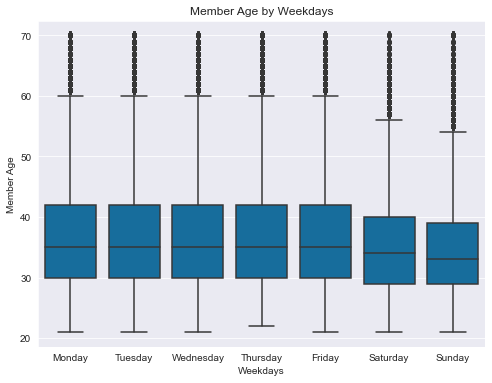

In [62]:
# What is the trip distribution for members in different age groups across the weekdays?
# To plot member age by weekdays

sb.boxplot(data = df_ford_new, x = 'start_date_day', y = 'member_age', color = base_color);
plt.xlabel('Weekdays');
plt.ylabel('Member Age');
plt.title('Member Age by Weekdays')

### We can make the following observations from the plot above:

* The Median value for Member Age based on trip distribution is lower on weekends compared to the Member Age on the other weekdays.
* The range, and interquartile range values for Member Age based on trip distribution is lower on weekends compared to the Member Age on the other weekdays (Mondays to Fridays).



From the box plot above, we can conclude that members mostly within the age group of 20 - 60 ride bikes during weekdays (Mondays to Fridays), while members mostly within the age group of 20 - 55 ride bikes on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Subscription use is far higher than consumer usage. Customers and subscribers have quite different riding habits and patterns. Most trips on work days and especially during rush hours (when going to work in the morning and getting off work in the afternoon) were made by subscribers because they use the bike sharing system for commuting, whereas customers typically ride for fun in the afternoon or early evening on weekends. The average ride length is somewhat longer for subscriber users than for consumer users, especially in the summer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It's interesting to note that subscribers tend to ride much more quickly and for shorter distances than typical customers. Additionally, subscribers used their bikes the most in October of the entire year.

## Multivariate Exploration



**To plot how bike trips ranges with member ages**

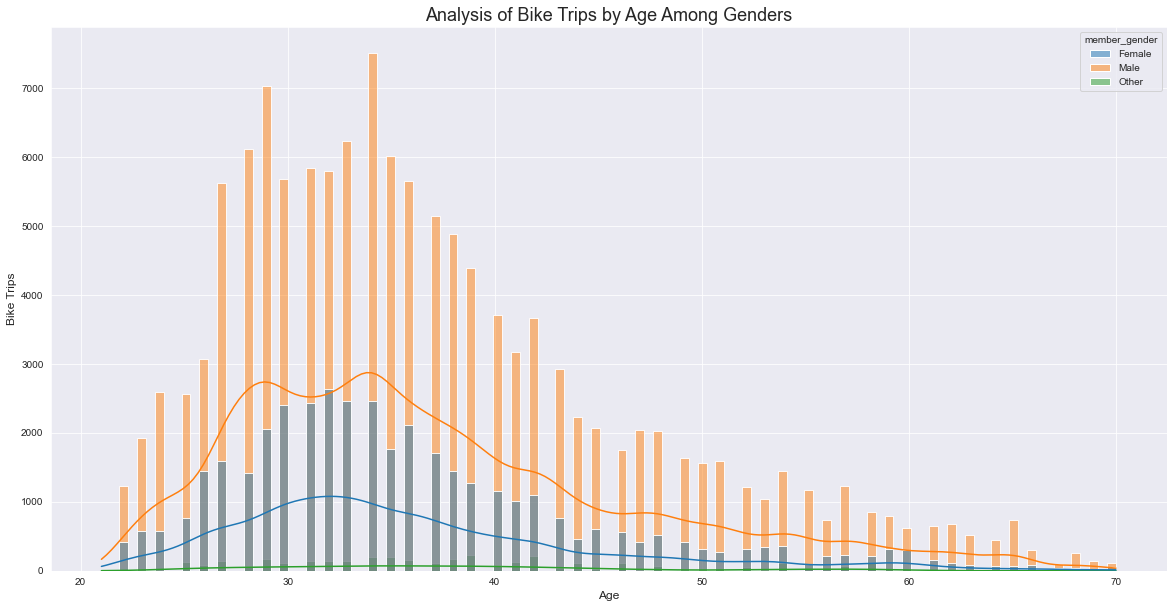

In [39]:
# What is distribution of bike trips by Age among gender?

fig, ax = plt.subplots(figsize = (20, 10))
ax = sb.histplot(data = df_ford_new, x = df_ford_new['member_age'], hue = 'member_gender', kde = True)
plt.title('Analysis of Bike Trips by Age Among Genders', fontsize = 18)
plt.ylabel('Bike Trips', fontsize = 12)
plt.xlabel('Age', fontsize = 12); 

From the plot above, we can see the disparity in bike trips between genders of different ages.

* The female gender between the age of 30 and 35 have an average bike trip of 2,500 which is arguably the highest bike trips for the female gender.

* The male gender between the age of 27 to 37 records the highest number of bike trips. More than 7,000 bike trips. 

**To plot the analysis of bike trips by weekdays among genders.**

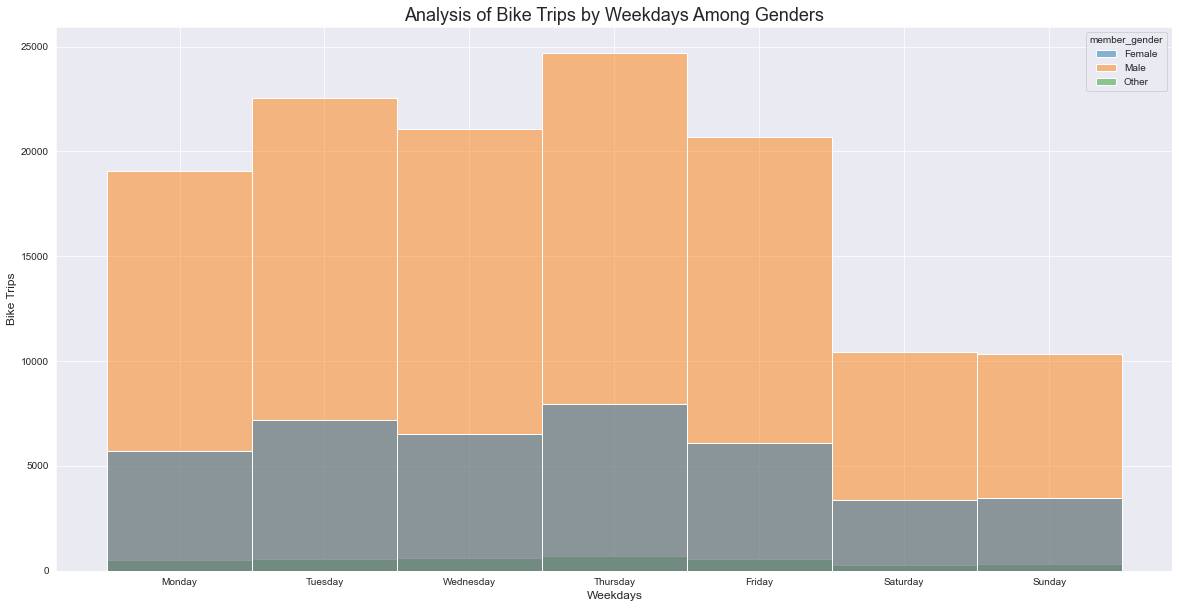

In [40]:
# What is the distribution of bike trips by Weekdays among gender?

fig, ax = plt.subplots(figsize = (20, 10))
ax = sb.histplot(data = df_ford_new, x = df_ford_new['start_date_day'], hue = 'member_gender')
plt.title('Analysis of Bike Trips by Weekdays Among Genders', fontsize = 18)
plt.ylabel('Bike Trips', fontsize = 12)
plt.xlabel('Weekdays', fontsize = 12); 

From the plot above, we can observe that there are lesser bike trips on weekends compared to weekdays. It also shows that the male gender have the highest number of bike trips between monday and friday.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From the exploration analysis in the multivariate section, we can observe the disparity in bike trips between genders of different ages. The female gender between the age of 30 and 35 have an average bike trip of 2,500 which is arguably the highest bike trips for the female gender.

> It's interesting to note that subscribers tend to ride much more quickly and for shorter distances than typical customers. Additionally, subscribers used their bikes the most in October of the entire year.

> The relationship between the various variables plotted is seen collectively and information is displayed simultaneously, strengthening some of the patterns identified in the preceding bivariate exploration as well as in the univariate exploration. Subscribers' efficient/short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. Customers clearly utilize the bike sharing system considerably differently than subscribers, frequently on weekends and in the afternoons, likely for leisure or city tours, as seen by the more flexible and lax pattern of their usage.

### Were there any interesting or surprising interactions between features?

> When features interact with one another and make sense when seen as a whole, there is little to surprise about. Because there are disproportionately more female riders and records than male ones, the usage habits of men and women are not as different or visible throughout the investigation. If there were more female data, it would be interesting to observe how male and female users of the system varied from one another.